In [ ]:
from google.colab import files

images = files.upload()

Saving DatasetZip.zip to DatasetZip.zip


In [ ]:
! ls -l

total 190800
-rw-r--r-- 1 root root 195369966 Mar 12 03:14 DatasetZip.zip
drwxr-xr-x 1 root root      4096 Mar  9 14:48 sample_data


In [ ]:
! unzip DatasetZip.zip

In [ ]:
! ls -l /content/DatasetZip/training

total 36
drwxr-xr-x 2 root root 12288 Mar  9 21:39 incorrectlyheld
drwxr-xr-x 2 root root 12288 Mar  9 21:41 withmask
drwxr-xr-x 2 root root 12288 Mar  9 21:42 withoutmask


In [ ]:
! ls -l /content/DatasetZip/testing

total 12
drwxr-xr-x 2 root root 4096 Mar  9 21:39 incorrectlyheld
drwxr-xr-x 2 root root 4096 Mar  9 21:41 withmask
drwxr-xr-x 2 root root 4096 Mar  9 21:42 withoutmask


In [ ]:
! ls -l /content/DatasetZip/validation

total 12
drwxr-xr-x 2 root root 4096 Mar  8 20:14 incorrectlyheld
drwxr-xr-x 2 root root 4096 Mar  8 20:11 withmask
drwxr-xr-x 2 root root 4096 Mar  8 19:40 withoutmask


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
my_augmented_generator = ImageDataGenerator(    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255, fill_mode='nearest')

In [ ]:
training_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/training', target_size=(256,256), batch_size=32, class_mode='categorical')

Found 530 images belonging to 3 classes.


In [ ]:
valid_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/validation', target_size=(256,256), batch_size=32, class_mode='categorical')

Found 122 images belonging to 3 classes.


In [ ]:
test_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/testing', target_size=(256,256), batch_size=32, class_mode='categorical')

Found 141 images belonging to 3 classes.


In [ ]:
import matplotlib.pyplot as plt
for my_batch in training_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    break


In [ ]:
import matplotlib.pyplot as plt
for my_batch in test_image_generator:
    # my_batch is a tuple with images and labels
    imagesT = my_batch[0]
    labelsT = my_batch[1]
    break


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = 0

In [ ]:
model = Sequential()
model.add( Conv2D( 64, ( 5,5 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model.add( Conv2D( 32, ( 5,5), activation = 'relu' ) )
model.add( Conv2D( 32, ( 5,5 ), activation = 'relu' ) )
model.add( Conv2D( 16, ( 5,5 ), activation = 'relu' ) )

model.add( Flatten() )
model.add( Dense( 64, activation = 'relu' ) )
model.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model_r2.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history = model.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.0960 - accuracy: 0.4000
Epoch 1: val_accuracy improved from -inf to 0.41803, saving model to model_r2.hdf5
17/17 [==============================] - 33s 1s/step - loss: 1.0960 - accuracy: 0.4000 - val_loss: 1.0890 - val_accuracy: 0.4180
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0882 - accuracy: 0.4226
Epoch 2: val_accuracy did not improve from 0.41803
17/17 [==============================] - 14s 809ms/step - loss: 1.0882 - accuracy: 0.4226 - val_loss: 1.0856 - val_accuracy: 0.4180
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0853 - accuracy: 0.4226
Epoch 3: val_accuracy did not improve from 0.41803
17/17 [==============================] - 14s 841ms/step - loss: 1.0853 - accuracy: 0.4226 - val_loss: 1.0837 - val_accuracy: 0.4180
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0820 - accuracy: 0.4226
Epoch 4: val_accuracy did not improve from 0.4

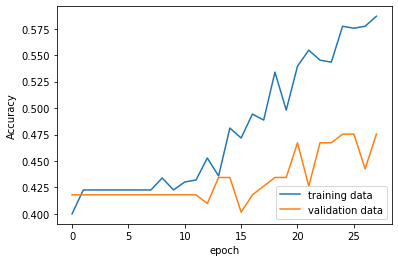

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model1 = 0

In [ ]:

model1 = Sequential()
model1.add( Conv2D( 128, ( 5,5 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model1.add( Conv2D( 64, ( 5,5), activation = 'relu' ) )
model1.add( Conv2D( 32, ( 5,5 ), activation = 'relu' ) )
model1.add( Conv2D( 16, ( 5,5 ), activation = 'relu' ) )

model1.add( Flatten() )
model1.add( Dense( 64, activation = 'relu' ) )
model1.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model1.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history = model1.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.0960 - accuracy: 0.4000
Epoch 1: val_accuracy improved from -inf to 0.40984, saving model to model1.hdf5
17/17 [==============================] - 68s 3s/step - loss: 1.0960 - accuracy: 0.4000 - val_loss: 1.0834 - val_accuracy: 0.4098
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0853 - accuracy: 0.4226
Epoch 2: val_accuracy did not improve from 0.40984
17/17 [==============================] - 27s 2s/step - loss: 1.0853 - accuracy: 0.4226 - val_loss: 1.0822 - val_accuracy: 0.4098
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0812 - accuracy: 0.4321
Epoch 3: val_accuracy improved from 0.40984 to 0.41803, saving model to model1.hdf5
17/17 [==============================] - 28s 2s/step - loss: 1.0812 - accuracy: 0.4321 - val_loss: 1.0816 - val_accuracy: 0.4180
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0787 - accuracy: 0.4283
Epoch 4: val_accuracy

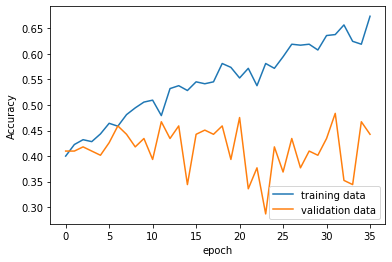

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model2 = 0

In [ ]:
 
model2 = Sequential()
model2.add( Conv2D( 64, ( 4,4 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model2.add( MaxPool2D(4, 4) )
model2.add( Conv2D( 32, ( 4,4 ), activation = 'relu' ) )
model2.add( MaxPool2D(4, 4) )
model2.add( Conv2D( 16, ( 4,4  ), activation = 'relu' ) )


model2.add( Flatten() )
model2.add( Dense( 64, activation = 'relu' ) )
model2.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model2.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model2.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history = model2.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.0943 - accuracy: 0.3642
Epoch 1: val_accuracy improved from -inf to 0.36066, saving model to model2.hdf5
17/17 [==============================] - 11s 622ms/step - loss: 1.0943 - accuracy: 0.3642 - val_loss: 1.0918 - val_accuracy: 0.3607
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0932 - accuracy: 0.3717
Epoch 2: val_accuracy improved from 0.36066 to 0.38525, saving model to model2.hdf5
17/17 [==============================] - 10s 589ms/step - loss: 1.0932 - accuracy: 0.3717 - val_loss: 1.0906 - val_accuracy: 0.3852
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0921 - accuracy: 0.3755
Epoch 3: val_accuracy improved from 0.38525 to 0.39344, saving model to model2.hdf5
17/17 [==============================] - 10s 602ms/step - loss: 1.0921 - accuracy: 0.3755 - val_loss: 1.0895 - val_accuracy: 0.3934
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.091

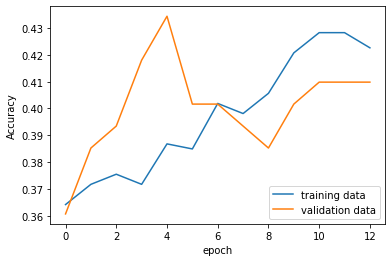

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model3 = 0

In [ ]:
 
model3 = Sequential()
model3.add( Conv2D( 64, ( 4,4 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model3.add( MaxPool2D(4, 4) )
model3.add( Conv2D( 32, ( 4,4 ), activation = 'relu' ) )

model3.add( Flatten() )
model3.add( Dense( 64, activation = 'relu' ) )
model3.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model3.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model2.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=32, verbose=1)
history = model3.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1174 - accuracy: 0.3000
Epoch 1: val_accuracy improved from -inf to 0.36885, saving model to model2.hdf5
17/17 [==============================] - 11s 647ms/step - loss: 1.1174 - accuracy: 0.3000 - val_loss: 1.0956 - val_accuracy: 0.3689
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0912 - accuracy: 0.3906
Epoch 2: val_accuracy improved from 0.36885 to 0.40164, saving model to model2.hdf5
17/17 [==============================] - 10s 609ms/step - loss: 1.0912 - accuracy: 0.3906 - val_loss: 1.0815 - val_accuracy: 0.4016
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0837 - accuracy: 0.4245
Epoch 3: val_accuracy improved from 0.40164 to 0.40984, saving model to model2.hdf5
17/17 [==============================] - 10s 598ms/step - loss: 1.0837 - accuracy: 0.4245 - val_loss: 1.0784 - val_accuracy: 0.4098
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.080

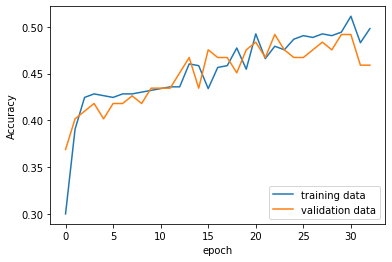

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model4 = 0

In [ ]:
 
model4 = Sequential()
model4.add( Conv2D( 32, ( 4,4 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 16, ( 4,4 ), activation = 'relu' ) )

model4.add( Flatten() )
model4.add( Dense( 64, activation = 'relu' ) )
model4.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model4.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model2.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=32, verbose=1)
history = model4.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.0777 - accuracy: 0.4245
Epoch 1: val_accuracy improved from -inf to 0.40984, saving model to model2.hdf5
17/17 [==============================] - 11s 599ms/step - loss: 1.0777 - accuracy: 0.4245 - val_loss: 1.0863 - val_accuracy: 0.4098
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0740 - accuracy: 0.4245
Epoch 2: val_accuracy did not improve from 0.40984
17/17 [==============================] - 10s 573ms/step - loss: 1.0740 - accuracy: 0.4245 - val_loss: 1.0852 - val_accuracy: 0.4098
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0715 - accuracy: 0.4358
Epoch 3: val_accuracy did not improve from 0.40984
17/17 [==============================] - 10s 567ms/step - loss: 1.0715 - accuracy: 0.4358 - val_loss: 1.0845 - val_accuracy: 0.4098
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0688 - accuracy: 0.4283
Epoch 4: val_accuracy improved from 0.40984 t

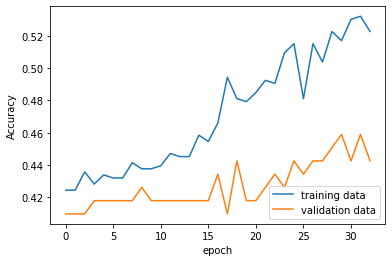

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model5 = 0

In [ ]:
 
model5 = Sequential()
model5.add( Conv2D( 32, ( 4,4 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model5.add( Conv2D( 16, ( 4,4 ), activation = 'relu' ) )

model5.add( Flatten() )
model5.add( Dense( 32, activation = 'relu' ) )
model5.add( Dense( 3, activation = 'sigmoid' ) )

In [ ]:
model5.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model5.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=32, verbose=1)
history = model5.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1035 - accuracy: 0.3736
Epoch 1: val_accuracy improved from -inf to 0.42623, saving model to model5.hdf5
17/17 [==============================] - 14s 737ms/step - loss: 1.1035 - accuracy: 0.3736 - val_loss: 1.0821 - val_accuracy: 0.4262
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0741 - accuracy: 0.4547
Epoch 2: val_accuracy improved from 0.42623 to 0.48361, saving model to model5.hdf5
17/17 [==============================] - 11s 665ms/step - loss: 1.0741 - accuracy: 0.4547 - val_loss: 1.0758 - val_accuracy: 0.4836
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0550 - accuracy: 0.4453
Epoch 3: val_accuracy did not improve from 0.48361
17/17 [==============================] - 11s 633ms/step - loss: 1.0550 - accuracy: 0.4453 - val_loss: 1.0718 - val_accuracy: 0.4590
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0372 - accuracy: 0.4981
Epoch 4: val

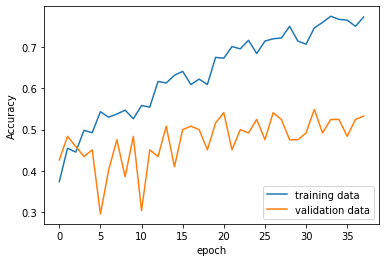

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model6 = 0

In [ ]:
 
model6 = Sequential()
model6.add( Conv2D( 32, ( 2,2 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model6.add( Conv2D( 16, ( 2,2 ), activation = 'relu' ) )
model6.add( Conv2D( 16, ( 2,2 ), activation = 'relu' ) )
model6.add( Conv2D( 16, ( 2,2 ), activation = 'relu' ) )
model6.add( Flatten() )
model6.add( Dense( 16, activation = 'relu' ) )
model6.add( Dense( 3, activation = 'sigmoid' ) )

In [ ]:
model6.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model5.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=32, verbose=1)
history = model6.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.0969 - accuracy: 0.3679
Epoch 1: val_accuracy improved from -inf to 0.40984, saving model to model5.hdf5
17/17 [==============================] - 101s 6s/step - loss: 1.0969 - accuracy: 0.3679 - val_loss: 1.0862 - val_accuracy: 0.4098
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0913 - accuracy: 0.4226
Epoch 2: val_accuracy did not improve from 0.40984
17/17 [==============================] - 11s 643ms/step - loss: 1.0913 - accuracy: 0.4226 - val_loss: 1.0852 - val_accuracy: 0.4098
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0862 - accuracy: 0.4226
Epoch 3: val_accuracy did not improve from 0.40984
17/17 [==============================] - 11s 650ms/step - loss: 1.0862 - accuracy: 0.4226 - val_loss: 1.0859 - val_accuracy: 0.4098
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0872 - accuracy: 0.4264
Epoch 4: val_accuracy did not improve from 0.40

### **Best possible model**

In [ ]:
model7 = 0

In [ ]:
 
model7 = Sequential()
model7.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model7.add( MaxPool2D(3,3,) )
model7.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )

model7.add( Flatten() )
model7.add( Dense( 32, activation = 'relu' ) )
model7.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model7.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model5.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=32, verbose=1)
history = model7.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1001 - accuracy: 0.3604
Epoch 1: val_accuracy improved from -inf to 0.42623, saving model to model5.hdf5
17/17 [==============================] - 51s 3s/step - loss: 1.1001 - accuracy: 0.3604 - val_loss: 1.0925 - val_accuracy: 0.4262
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0896 - accuracy: 0.4113
Epoch 2: val_accuracy improved from 0.42623 to 0.43443, saving model to model5.hdf5
17/17 [==============================] - 48s 3s/step - loss: 1.0896 - accuracy: 0.4113 - val_loss: 1.0822 - val_accuracy: 0.4344
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0810 - accuracy: 0.4189
Epoch 3: val_accuracy did not improve from 0.43443
17/17 [==============================] - 49s 3s/step - loss: 1.0810 - accuracy: 0.4189 - val_loss: 1.0856 - val_accuracy: 0.4098
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0901 - accuracy: 0.4245
Epoch 4: val_accuracy

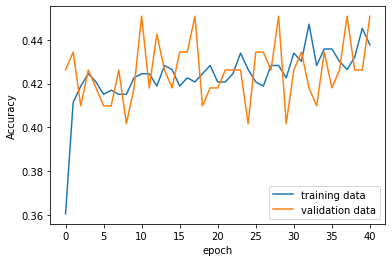

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

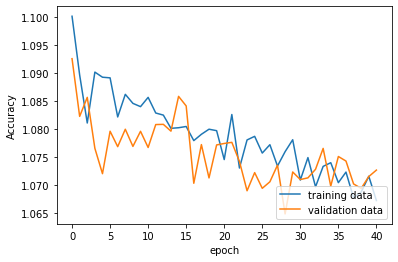

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
Y = [] # empty list of true labels
P = [] # empty list of predictions
for i in range(141):
   x, y = test_image_generator.next()
   p = model7.predict(x)
   Y.extend(y)
   P.extend(p)


In [ ]:
p = model7.predict(x)
accuracy = model7.evaluate(x,y)
print("Model accuracy:", accuracy[1]*100)

1/1 [==============================] - 1s 579ms/step - loss: 1.0588 - accuracy: 0.4688
Model accuracy: 46.875
0.0


In [ ]:
p1 = model7.predict(imagesT)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 42)      1176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 42)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 28)        10612     
                                                                 
 flatten (Flatten)           (None, 188272)            0         
                                                                 
 dense (Dense)               (None, 32)                6024736   
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                      